In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
import parameters 

Au début nous avons fixer le dropout à 0.6 et le nombre d'epoch à 15  car nous nous sommes aperçu qu'un nombre d'epoch important overfit les données. Nous avons un set de 6 190 enregistrements nous entrainons nos modeles sur 90% de ces enregistrements et 10% sont utilisé pour calculer les val_accuracy et val_loss lors de l'entrainement.

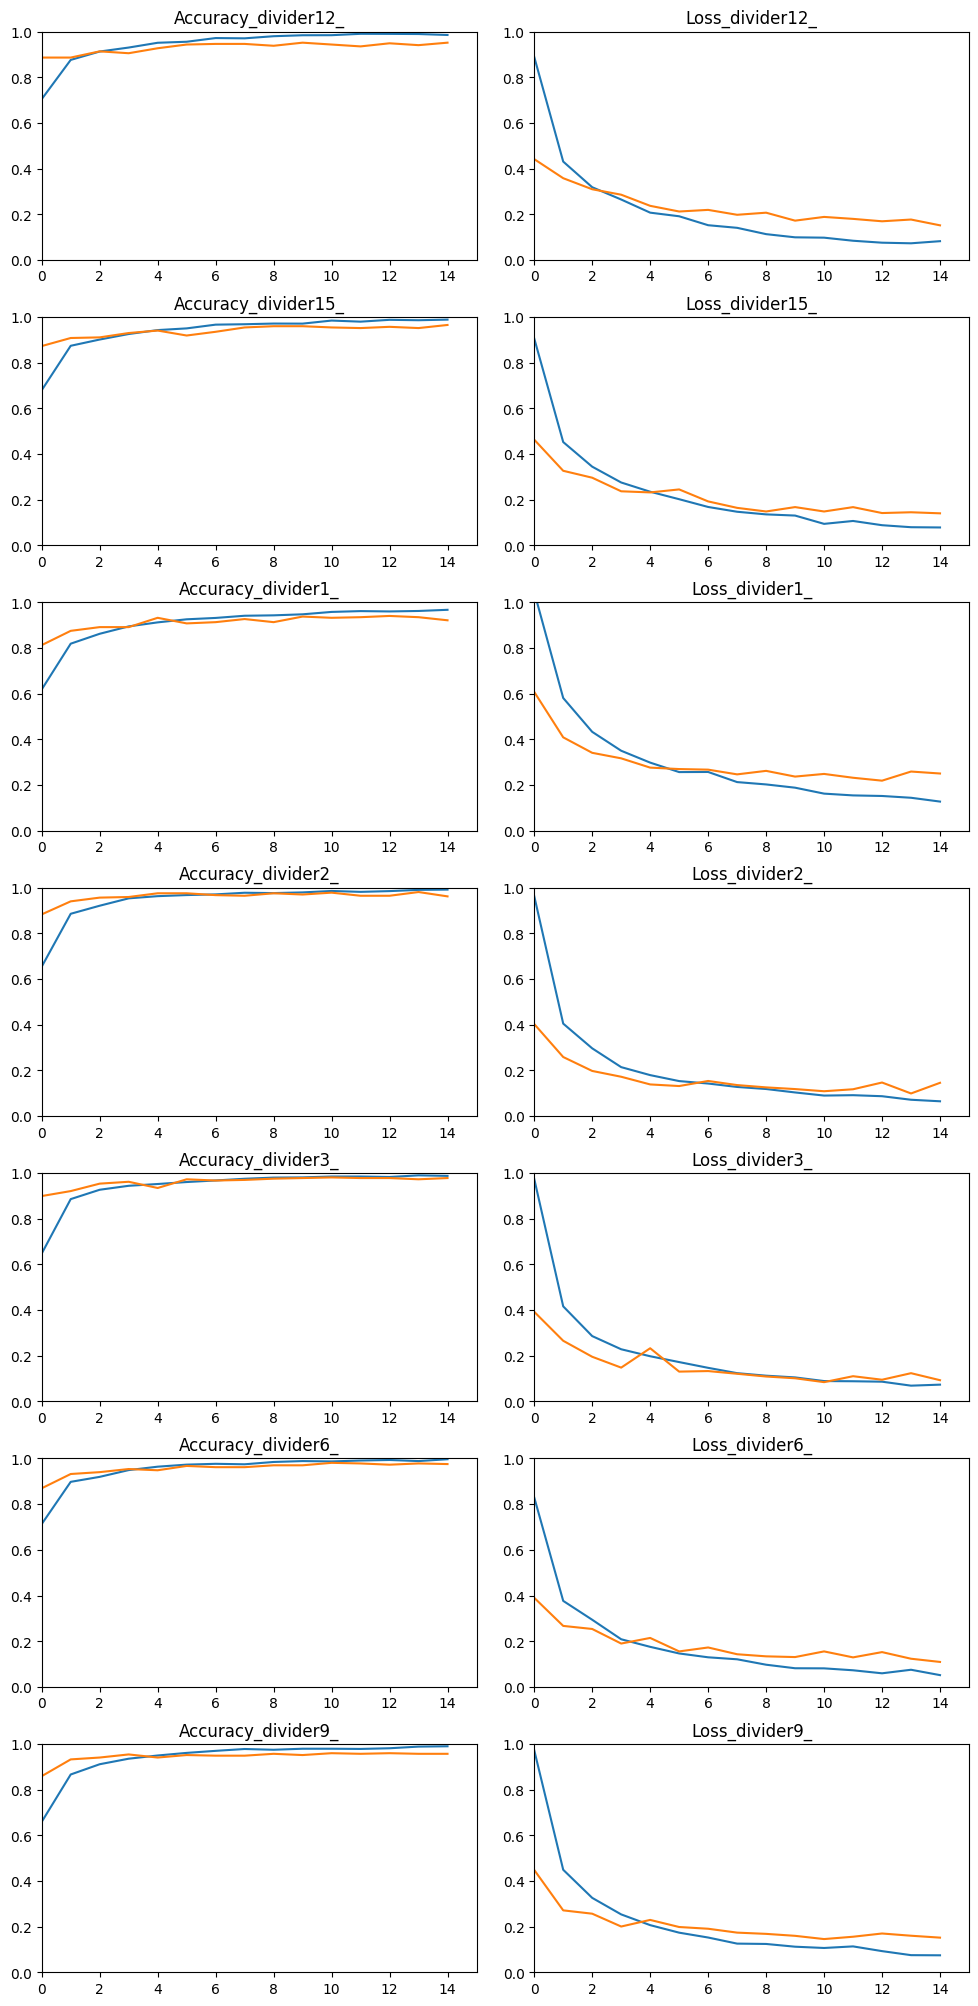

In [2]:
directory = '../logs/train_log/' 
pathSaveGraph = './graph'
index = 0
change = 0
nb_file_conv2d_divider = len([entry for entry in os.listdir(directory) if (os.path.isfile(os.path.join(directory, entry))
                                                                           and len(entry.split("_"))==3 and
                                                                           ("conv2d" in entry.split("_")[0]))])

figure, axis = plt.subplots(nb_file_conv2d_divider, 2,figsize=(10,20))
figure.tight_layout(h_pad=2)
custom_xlim = (0, 15)
custom_ylim = (0, 1)

# Setting the values for all axes.
plt.setp(axis, xlim=custom_xlim, ylim=custom_ylim)

#Definition des chemins d'acces a nos fichiers log
for filename in os.listdir(directory):
    if(len(filename.split("_"))==3 and ("conv2d" in filename.split("_")[0])):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            data = pd.read_csv(f)
            axis[index, 0].plot(data['accuracy'])
            axis[index, 0].plot(data['val_accuracy'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name

                
            axis[index, 0].set_title("Accuracy" + title)

            axis[index, 1].plot(data['loss'])
            axis[index, 1].plot(data['val_loss'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name 
            axis[index, 1].set_title("Loss" + title)

            index+=1
plt.show()

On ne peux vraiment faire la différence nous allons zoomer autour de 1 et afficher les valeurs. En bleu les valeurs de train et en oranges les valeurs de test. 

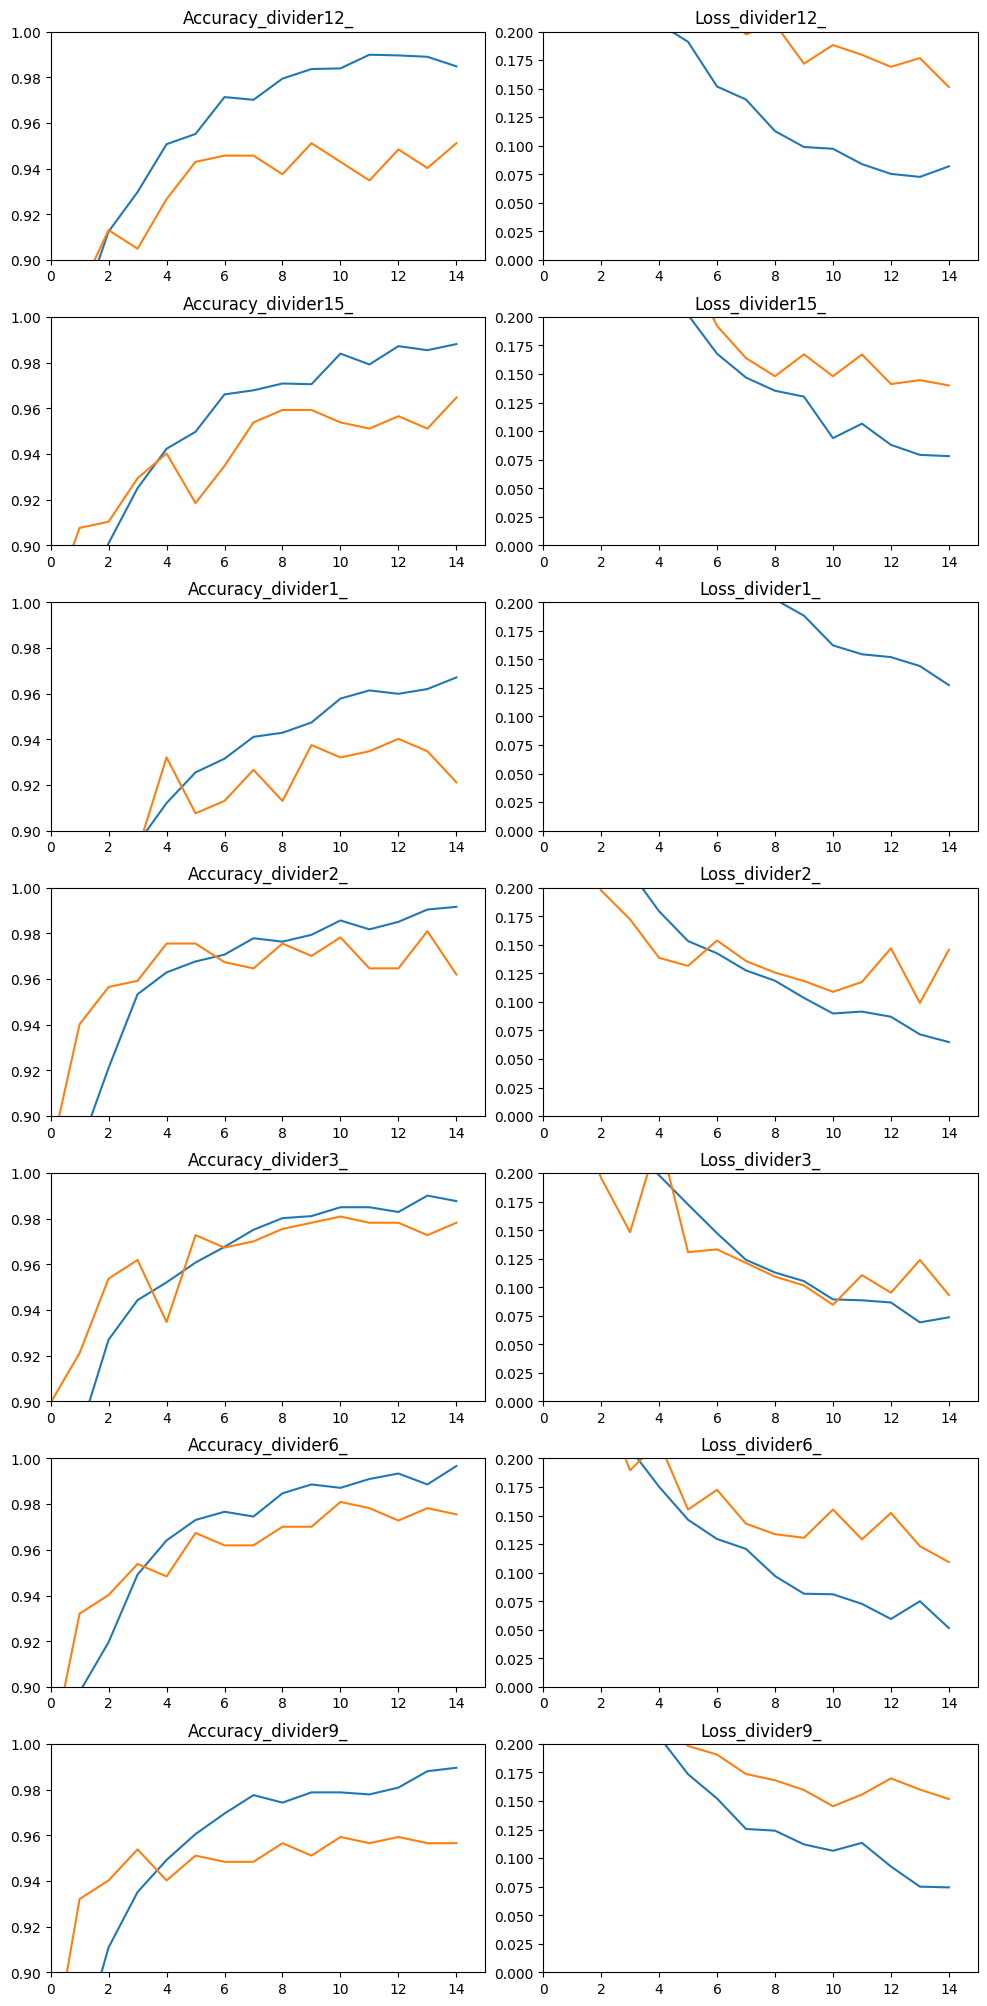

In [3]:
# Setting the values for all axes.
index = 0
change = 0
nb_file_conv2d_divider = len([entry for entry in os.listdir(directory) if (os.path.isfile(os.path.join(directory, entry))
                                                                           and len(entry.split("_"))==3 and
                                                                           ("conv2d" in entry.split("_")[0]))])
figure, axis = plt.subplots(nb_file_conv2d_divider, 2,figsize=(10,20))
figure.tight_layout(h_pad=2)
custom_xlim = (0, 15)
custom_ylim_acc = (0.9, 1)
custom_ylim_loss=(0, 0.2)
# Setting the values for all axes.
plt.setp(axis[:,0], xlim=custom_xlim, ylim=custom_ylim_acc)
# Setting the values for all axes.
plt.setp(axis[:,1], xlim=custom_xlim, ylim=custom_ylim_loss)
#Definition des chemins d'acces a nos fichiers log
for filename in os.listdir(directory):
    if(len(filename.split("_"))==3 and ("conv2d" in filename.split("_")[0])):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            data = pd.read_csv(f)
            axis[index, 0].plot(data['accuracy'])
            axis[index, 0].plot(data['val_accuracy'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name

                
            axis[index, 0].set_title("Accuracy" + title)

            axis[index, 1].plot(data['loss'])
            axis[index, 1].plot(data['val_loss'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name 
            axis[index, 1].set_title("Loss" + title)

            index+=1
plt.show()

On peut donc comparer les différentes valeurs de manières plus précise. Nous avons choisis le diviseurs 6 car sa val_accuracy était la meilleurs des diviseurs.

Pour confirmer nos résultats nous avons effectuer une validations sur un jeux de données de 2 473 données. Voici les résultats:

../logs/predict_log/predictionsdivider1.csv
deux:deux 359
deux:un 8
deux:oui 8
deux:non 57
deux:quatre 13
deux:trois 1
Precision  deux : 0.804932735426009 %
non:deux 10
non:un 30
non:oui 11
non:non 338
non:quatre 17
non:trois 18
Precision  non : 0.7971698113207547 %
oui:deux 5
oui:un 7
oui:oui 401
oui:non 16
oui:quatre 4
oui:trois 5
Precision  oui : 0.9155251141552512 %
quatre:deux 7
quatre:un 51
quatre:oui 2
quatre:non 14
quatre:quatre 331
quatre:trois 14
Precision  quatre : 0.7899761336515513 %
trois:deux 1
trois:un 13
trois:oui 3
trois:non 20
trois:quatre 6
trois:trois 381
Precision  trois : 0.8985849056603774 %
un:deux 4
un:un 354
un:oui 0
un:non 14
un:quatre 9
un:trois 7
Precision  un : 0.9123711340206185 %
Precision totale : 0.8523040567152422 %
../logs/predict_log/predictionsdivider2.csv
deux:deux 419
deux:oui 5
deux:non 14
deux:quatre 7
deux:un 1
deux:trois 0
Precision  deux : 0.9394618834080718 %
non:deux 33
non:oui 3
non:non 361
non:quatre 14
non:un 3
non:trois 10
Precision  

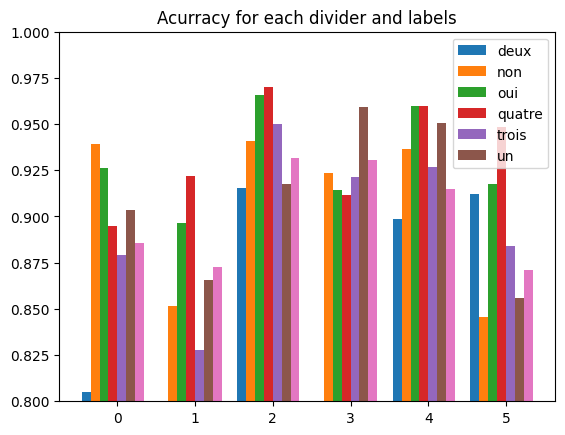

In [12]:
fig, ax = plt.subplots()
ax.set_ylim([0.80,1])
plt.title("Acurracy for each divider and labels")
width = 0.8
index=0
avg_accuracy=[]
for divider in [1,2,3,6,9,12,15]:
    predict_accuracy=[]
    file_name="../logs/predict_log/predictionsdivider"+str(divider)+".csv"
    print(file_name)
    df=pd.read_csv(file_name, header=1)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    inacurate_total=0
    total=0
    for classe in df['Actual class'].drop_duplicates():
        inacurate_class=0
        total_class=0
        for predict in df['Prediction'].drop_duplicates():
            number=df.loc[((df["Actual class"]==classe) & (df["Prediction"]==predict))].shape[0]
            stringprint=str(classe) +":"+str(predict)+" "+str(number)
            print(stringprint)
            if(predict!=classe):
                inacurate_total+=number
                inacurate_class+=number
            total+=number
            total_class+=number   
        predict_accuracy.append((total_class-inacurate_class)/total_class)
        print("Precision ",classe,":",(total_class-inacurate_class)/total_class,"%")
    print("Precision totale :",(total-inacurate_total)/total,"%")
    avg_accuracy.append((total-inacurate_total)/total)
    labels=df['Actual class'].drop_duplicates()
    x = np.arange(len(labels))
    rect1 = ax.bar(x+index*width/7-width/2,predict_accuracy,width/7, label=str(divider))
    ax.legend(labels)
    index+=1

In [5]:
ax.set_title('Predict')
ax.set_xticks(x, labels)
ax.set_ylim([0.80, 1])
ax.legend()
fig.tight_layout()
plt.show()

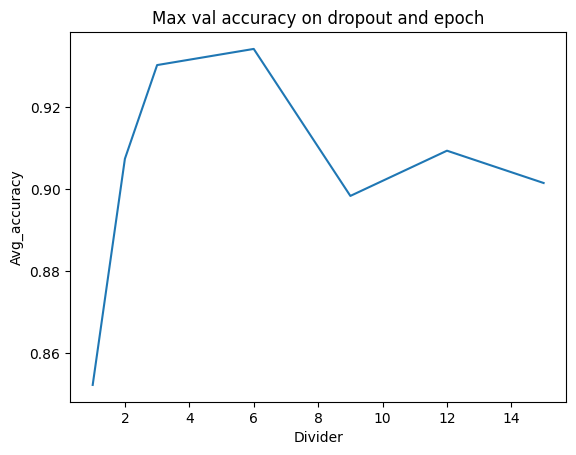

In [6]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes()
ax.set_xlabel('Divider')
ax.set_ylabel('Avg_accuracy')

ax.plot([1,2,3,6,9,12,15], avg_accuracy)
ax.set_title('Max val accuracy on dropout and epoch')
plt.show()    

Nous avons donc confirmer que le divider 6 était le plus adapté pour notre utilisation.

Maintenant que nous avons fixer le divider à 6 nous avons décider d'explorer les paramètres avec le nombre d'epoch et le dropout. Avec les paramètres Divider=6, Dropout=0.6 et Epoch=15 nous obtenons une précision de 93.4 %

Pour cela nous avons fixer differentes valeurs d'epoch et dropout et nous avons entrainer notre model avec ces paramètres.

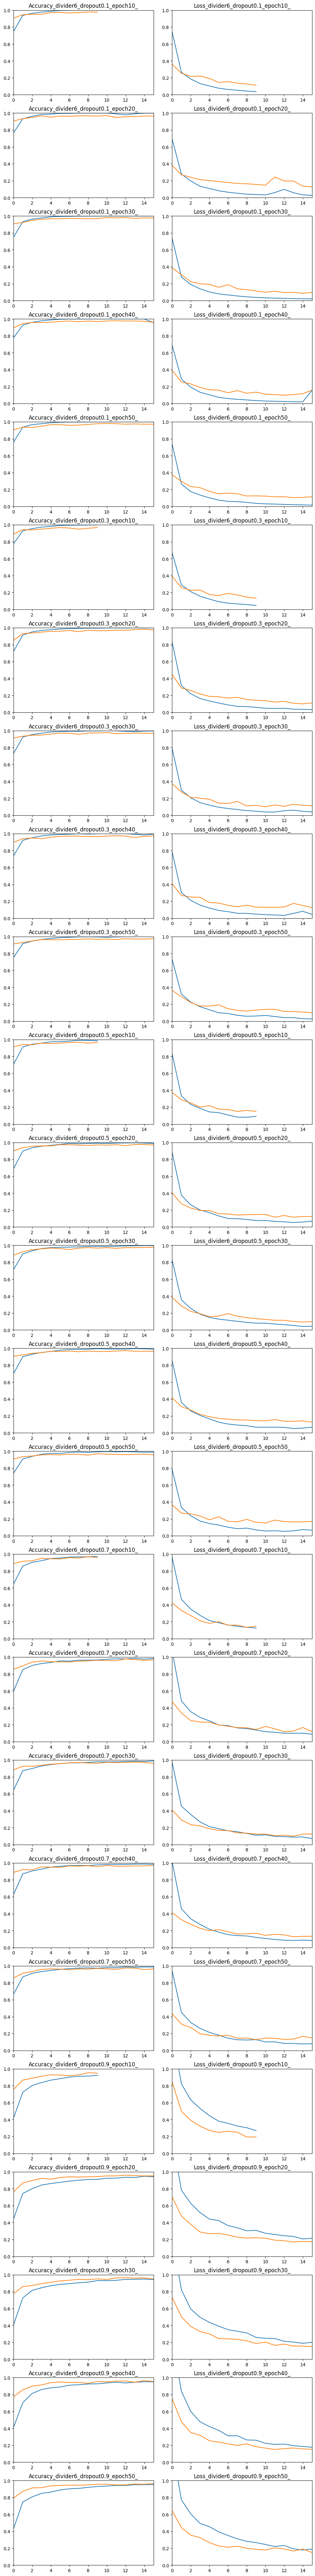

In [7]:
index = 0
change = 0
nb_file_conv2d_divider = len([entry for entry in os.listdir(directory) if (os.path.isfile(os.path.join(directory, entry))
                                                                           and len(entry.split("_"))==5 and
                                                                           ("conv2d" in entry.split("_")[0]))])

figure, axis = plt.subplots(nb_file_conv2d_divider, 2,figsize=(10,80))
figure.tight_layout(h_pad=2)
custom_xlim = (0, 15)
custom_ylim = (0, 1)

# Setting the values for all axes.
plt.setp(axis, xlim=custom_xlim, ylim=custom_ylim)

#Definition des chemins d'acces a nos fichiers log
for filename in os.listdir(directory):
    if(len(filename.split("_"))==5 and ("conv2d" in filename.split("_")[0])):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            data = pd.read_csv(f)
            axis[index, 0].plot(data['accuracy'])
            axis[index, 0].plot(data['val_accuracy'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name

                
            axis[index, 0].set_title("Accuracy" + title)

            axis[index, 1].plot(data['loss'])
            axis[index, 1].plot(data['val_loss'])
            title=""
            for name in filename.split("history.csv")[0].split("_")[1:]:
                title = title+"_"+name 
            axis[index, 1].set_title("Loss" + title)

            index+=1
plt.show()

Avec ces nombreuse données nous avons choisis une représentation différente avec le dropout en fonction du nombre d'epoch et en affichant la val_accuracy

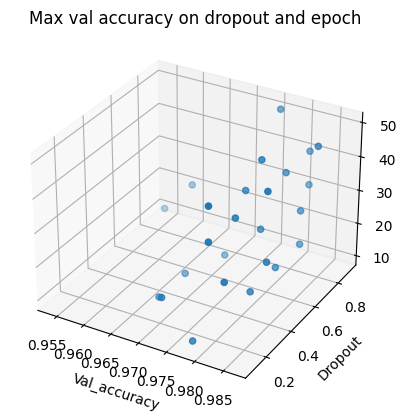

In [8]:
# Setting the values for all axes.
index = 0
change = 0
nb_file_conv2d_divider = len([entry for entry in os.listdir(directory) if (os.path.isfile(os.path.join(directory, entry))
                                                                           and len(entry.split("_"))==3 and

                                                                           ("conv2d" in entry.split("_")[0]))])
dropouts=[]
epochs=[]
max_val_accuracy=[]
for entry in os.listdir(directory):
    if (os.path.isfile(os.path.join(directory, entry))
        and len(entry.split("_"))==5 and
        ("conv2d" in entry.split("_")[0])):
            f = os.path.join(directory, entry)
            # checking if it is a file
            if os.path.isfile(f):
                data = pd.read_csv(f)
                dropouts.append(float(entry.split("_")[2].split("dropout")[1]))
                epochs.append(float(entry.split("_")[3].split("epoch")[1]))
                max_val_accuracy.append(float(max(data['val_accuracy'])))
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_xlabel('Val_accuracy')
ax.set_ylabel('Dropout')
ax.set_zlabel('Epoch')

ax.scatter(max_val_accuracy, dropouts,  epochs)
ax.set_title('Max val accuracy on dropout and epoch')
plt.show()     



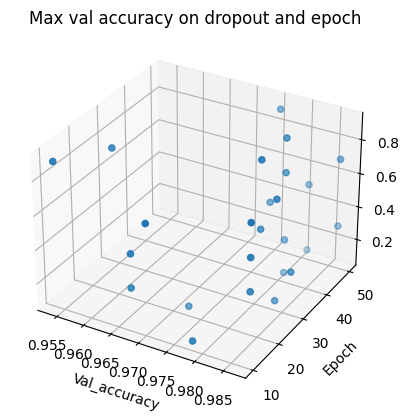

In [9]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_xlabel('Val_accuracy')
ax.set_ylabel('Epoch')
ax.set_zlabel('Dropout')

ax.scatter(max_val_accuracy, epochs, dropouts )
ax.set_title('Max val accuracy on dropout and epoch')
plt.show()     


Le nous alons donc selectionner le maximun de val_accuracy:

In [10]:
compteur=0
print(max(max_val_accuracy))
for val in max_val_accuracy:
    if(max(max_val_accuracy)==val):
        print('Dropout :', dropouts[compteur])
        print('Epoch :', epochs[compteur])
        print('Accuracy :', max_val_accuracy[compteur])
    compteur+=1

0.9864130616188048
Dropout : 0.3
Epoch : 30.0
Accuracy : 0.9864130616188048
Dropout : 0.3
Epoch : 50.0
Accuracy : 0.9864130616188048
Dropout : 0.7
Epoch : 50.0
Accuracy : 0.9864130616188048


Nous voyons donc qu'il y a plusieurs max identiques pour différents paramètres.

Nous alons maintenant vérifier que les val_accuracy obtenues se reflètent bien sur les données de tests.

f
../logs/predict_log\predictionsdivider6_dropout0.3_epoch30.csv
deux:deux 415
deux:non 22
deux:oui 2
deux:un 4
deux:quatre 3
deux:trois 0
Precision  deux : 0.9304932735426009 %
non:deux 12
non:non 394
non:oui 5
non:un 5
non:quatre 4
non:trois 4
Precision  non : 0.9292452830188679 %
oui:deux 0
oui:non 8
oui:oui 418
oui:un 6
oui:quatre 3
oui:trois 3
Precision  oui : 0.954337899543379 %
quatre:deux 1
quatre:non 1
quatre:oui 0
quatre:un 13
quatre:quatre 402
quatre:trois 2
Precision  quatre : 0.9594272076372315 %
trois:deux 0
trois:non 4
trois:oui 4
trois:un 6
trois:quatre 4
trois:trois 406
Precision  trois : 0.9575471698113207 %
un:deux 3
un:non 7
un:oui 3
un:un 358
un:quatre 12
un:trois 5
Precision  un : 0.9226804123711341 %
Precision totale : 0.9424970460811343 %
f
../logs/predict_log\predictionsdivider6_dropout0.3_epoch50.csv
deux:deux 416
deux:oui 9
deux:non 14
deux:un 4
deux:quatre 3
deux:trois 0
Precision  deux : 0.9327354260089686 %
non:deux 13
non:oui 5
non:non 390
non:un 7
non:qu

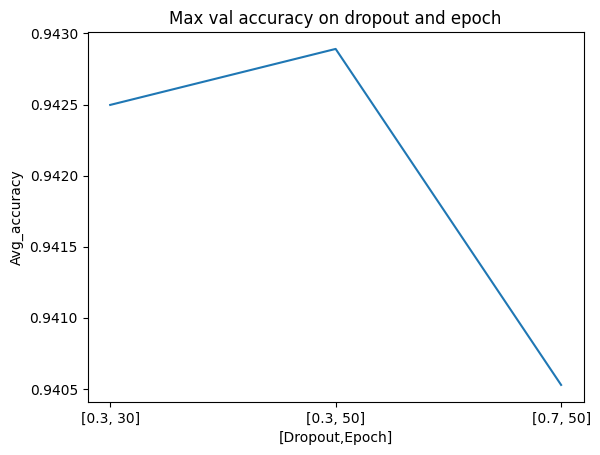

In [19]:
#fig, ax = plt.subplots()
width = 0.8
index=0
avg_accuracy=[]
directory='../logs/predict_log'
combinaison= [[0.3,30],[0.3,50],[0.7,50]]
for entry in os.listdir(directory):
    if (os.path.isfile(os.path.join(directory, entry))
        and len(entry.split("_"))==3 and
        ("divider6" in entry.split("_")[0]) and 
        [float(entry.split("_")[1].split("dropout")[1]),float(entry.split("_")[2].split("epoch")[1].split(".csv")[0])] in combinaison):
            print('f')
            f = os.path.join(directory, entry)
            # checking if it is a file
            if os.path.isfile(f):
                print(f )
                df=pd.read_csv(f , header=1)
                df.drop(df.columns[[0]], axis=1, inplace=True)
                inacurate_total=0
                total=0
                for classe in df['Actual class'].drop_duplicates():
                    inacurate_class=0
                    total_class=0
                    for predict in df['Prediction'].drop_duplicates():
                        number=df.loc[((df["Actual class"]==classe) & (df["Prediction"]==predict))].shape[0]
                        stringprint=str(classe) +":"+str(predict)+" "+str(number)
                        print(stringprint)
                        if(predict!=classe):
                            inacurate_total+=number
                            inacurate_class+=number
                        total+=number
                        total_class+=number   
                    predict_accuracy.append((total_class-inacurate_class)/total_class)
                    print("Precision ",classe,":",(total_class-inacurate_class)/total_class,"%")
                print("Precision totale :",(total-inacurate_total)/total,"%")
                avg_accuracy.append((total-inacurate_total)/total)
                labels=df['Actual class'].drop_duplicates()
                x = np.arange(len(labels))
                #rect1 = ax.bar(x+index*width/7-width/2,predict_accuracy,width/7, label=str(f))
                index+=1
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes()
ax.set_xlabel('[Dropout,Epoch]')
ax.set_ylabel('Avg_accuracy')
combinaison_str=[str(combinaison[0]),str(combinaison[1]),str(combinaison[2])]
ax.plot(combinaison_str, avg_accuracy)
ax.set_title('Max val accuracy on dropout and epoch')
plt.show()  

On peut observer que notre accuracy n'est  donc pas aussi bonne que celle prévue par nos modèles. Nous n'avons pas eu assez de temps afin d'expliquer ce phénomène.
